In [81]:
pip install bioinfokit

In [82]:
pip install Bio

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
!cat /content/reads_for_analysis.fastq

Streaming output truncated to the last 5000 lines.
CCCCCFFFFFFCGGGGGGGGGGHHHHHHGGGGGGGHHHHHHHGGGGGHHHGHGHGHHHHHHHHHHHHGHHHHGGGGGHHHHGGGGGHGGGGGHHHHHHGGGGGGGGGGGGGGGGGHHGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGFFFF
@M00827:12:000000000-AEUNW:1:1108:11713:13348 1:N:0:6
CGTCGATGAAGAACACTTTGGTCAGGATGCTGCCAACGAAGTAAGCGTGCCGTATCCGTTCAAATCTGCCACCGAACTGCTCGCGTACTGTAATGAAACCGGCTATTCGCTGTCTGGTCTCGCTATGCAGAACGAACTGGCGCTGCACAGC
+
CCCCCCCFFFFFGGGGGGGGGGHHHHHHHHHHHHHGGGGGGGHHHHCGGGGGEGHHHGGHHHHHHHHHHHGHHGGGGGHHHHGGGGGGGHHHGHGHHHHHGEGGGHHHHGGGGGHHHHHFHHGGGGHHHHHGHGGGGFHHHGGGGGGHHHH
@M00827:12:000000000-AEUNW:1:1108:25711:13369 1:N:0:6
GCTAAAGGTTTTACCGTTCAGCGCCACCGGATGACCTTGTTCAAAGCGTACTGTGACTTCTTCTGCCGGGATCTTCACGCTCTCATCCCAGAATTTCACGCCCATAATCGGGTTGACGATTTTGACGCTGGAGTTGAGGTATTCCAGATCC
+
CCCCCBFFFFFCGGGGGGGGGGGGGGGHGGGGGHHHHHHGGHHHHFGGGFGHHHGFGHHHHHHHHHHGGGGGGHHHHHHGGGHGGHHHHHFHHHHHHHHHHGGFHHGHHGGGGGGHHGGGHGHHGHFGGDGHHHHHBGHHHGHHHHHHHGH
@M00827:12:000000000-AEUNW:1:1108:13489:13394 1:N:0:6
GAATGACATTATATTTAACAAGT

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Koduotės formato tikrinimas

In [85]:
from bioinfokit import analys
analys.format.fq_qual_var(file="/content/reads_for_analysis.fastq")

The fastq quality format is Sanger (Offset +33)


C/G nukleotidų pasiskirstymas read'uose

In [90]:
def getCGRatio(sequence):
  cCount = sequence.count("C")
  gCount = sequence.count("G")
  ratio = round(((cCount+gCount) / len(sequence)),2)
  return ratio

In [129]:
from bioinfokit.analys import fastq
import collections
fastq_iter = fastq.fastq_reader("/content/reads_for_analysis.fastq")
ratioList = []
count1 = 0
count2 = 0
count3 = 0
for record in fastq_iter:
    header_1, sequence, header_2, qual = record
    ratioList.append(getCGRatio(sequence))

    if getCGRatio(sequence) >= 0.25 and getCGRatio(sequence) <= 0.39 and count1 < 5:
      print("Iš pirmo piko: ", sequence)
      print("Id: ", header_1)
      count1 = count1 + 1
    if getCGRatio(sequence) >= 0.45 and getCGRatio(sequence) <= 0.59 and count2 < 5:
      print("Iš antro piko: ", sequence)
      print("Id: ", header_1)
      count2 = count2 + 1 
    if getCGRatio(sequence) >= 0.66 and getCGRatio(sequence) <= 0.76 and count3 <5:
        print("Iš trečio piko: ", sequence)
        print("Id: ", header_1)
        count3 = count3 +1

ratioMap = collections.Counter(ratioList)
print("C/G nukletidų dalis read’o sekoje ir read’ų skaičius")
print(ratioMap)

Iš pirmo piko:  TGCGTTTATTACATTACCTTCTATTATATTTGCTGACGAACCAACAGGTGCACTGGATTCTAAAAGTACTCAAGATTTATTAAAACGATTAACAAGAATGAATGAAGCATTTAAGTCTACAATTATTATGGTAACGCATGATCCTGTTGC
Id:  @M00827:12:000000000-AEUNW:1:1101:12983:1610 1:N:0:6
Iš antro piko:  AGGCGTTATCGTGGCGATGACGCTGGAAGAAGCGGAAGCGGCTGTTCACGATATGCTGGCGGGCAACGCTTTTGGCGACGCGGGTCATCGCATCGTTATCGAAGAGTTCCTCGATGGCGAAGAAGCGAGCTTTATCGTGATGGTGGACGGC
Id:  @M00827:12:000000000-AEUNW:1:1101:16324:1777 1:N:0:6
Iš antro piko:  AATGCATCTTTAATCGGGAACTTTCATGAAAGCACCAGGCTTGCCCGCCGATCAACAATTTTTCGCCGATCTGTTCAGCGGCCTGGTGCTTAACCCGCAACTACTGGGGCGCGTCTGGTTTGCCAGCCAGCCTGCCTCGTTGCCGGTGGGC
Id:  @M00827:12:000000000-AEUNW:1:1101:18840:1877 1:N:0:6
Iš antro piko:  ATACATATAGTGAAAATAGAGGCGGAAATAGTTTTTCCGTACGGCGCTAAACAGCTCGCGTACCGTAGGCGGCGTCGCGCGCGTGGCATCGTCTTCACCATAAACCAGCTCTTTACGGTAGGCAGCCTCTACACGCTGGTTTTTAAACTCC
Id:  @M00827:12:000000000-AEUNW:1:1101:18967:1954 1:N:0:6
Iš pirmo piko:  ATTCATGACCTAATGTCACTGGAAAATTAACTTTATAATGACCTTCATAAGTATGAATATCTGTGCCACAAATTCCTGCAT

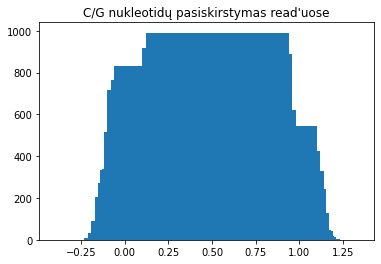

In [119]:
#čia nesimato pikai, todėl buvo perkeltos keys ir values į excelį
import matplotlib.pyplot as plt
keys = []
values = []

for key, value in rationMap.items():
  keys.append(key)
  values.append(value)

plt.bar(keys, values)
plt.title("C/G nukleotidų pasiskirstymas read'uose")
plt.show()

In [120]:
import pandas as pd
df1 = pd.DataFrame([keys, values])
df1.to_excel("/content/output.xlsx")